<a href="https://colab.research.google.com/github/AmandaPCerqueira/P-s/blob/main/An%C3%A1lise%20de%20cr%C3%A9dito%20-%20Banco%20X%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de risco de crédito do cliente**

Objetivo: Com base em características pessoais do cliente e dados de movimentação financeira, o modelo deverá ser capaz de prever uma possível inadimplencia e o banco poderá prpor acções

In [ ]:
!pip install pandas scikit_learn

In [ ]:
  # Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [2]:
import pandas as pd
tabela = pd.read_csv('/content/drive/MyDrive/credito.csv')
print(tabela)


              id  default  idade sexo  dependentes         escolaridade  \
0      768805383        0     45    M            3         ensino medio   
1      818770008        0     49    F            5             mestrado   
2      713982108        0     51    M            3             mestrado   
3      769911858        0     40    F            4         ensino medio   
4      709106358        0     40    M            3  sem educacao formal   
...          ...      ...    ...  ...          ...                  ...   
10122  772366833        0     50    M            2             mestrado   
10123  710638233        1     41    M            2                   na   
10124  716506083        1     44    F            1         ensino medio   
10125  717406983        1     30    M            2             mestrado   
10126  714337233        1     43    F            2             mestrado   

      estado_civil   salario_anual tipo_cartao  meses_de_relacionamento  \
0           casado     $

In [ ]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [ ]:
from sklearn.preprocessing import LabelEncoder
# vai transformar as colunas de texto em números, ex: profissoes vai sair de cientista, professor, mecanico, etc para 0, 1, 2, etc
codificador = LabelEncoder()

# só não aplicamos na coluna de score_credito que é o nosso objetivo
for coluna in tabela.columns:
    if tabela[coluna].dtype == "object" and coluna != "default":
        tabela[coluna] = codificador.fit_transform(tabela[coluna])

# verificando se realmente todas as colunas foram modificadas
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       10127 non-null  int64
 1   default                  10127 non-null  int64
 2   idade                    10127 non-null  int64
 3   sexo                     10127 non-null  int64
 4   dependentes              10127 non-null  int64
 5   escolaridade             10127 non-null  int64
 6   estado_civil             10127 non-null  int64
 7   salario_anual            10127 non-null  int64
 8   tipo_cartao              10127 non-null  int64
 9   meses_de_relacionamento  10127 non-null  int64
 10  qtd_produtos             10127 non-null  int64
 11  iteracoes_12m            10127 non-null  int64
 12  meses_inativo_12m        10127 non-null  int64
 13  limite_credito           10127 non-null  int64
 14  valor_transacoes_12m     10127 non-null  int64
 15  qt

In [ ]:
# se o nosso modelo chutasse tudo "0" (adimplente), qual seria a acurácia do modelo?
contagem_default = tabela["default"].value_counts()
print(contagem_default[0] / sum(contagem_default))

0.8393403772094401


In [ ]:
from sklearn.metrics import accuracy_score

# calculamos as previsoes
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste.to_numpy())

# comparamos as previsoes com o y_teste
# esse score queremos o maior (maior acuracia, mas tb tem que ser maior do que o chute de tudo adimplente)
print(accuracy_score(y_teste, previsao_arvore))
print(accuracy_score(y_teste, previsao_knn))


0.9401118789075353
0.8585060875287923


In [ ]:
# escolhendo quais colunas vamos usar para treinar o modelo
# y é a coluna que queremos que o modelo calcule
# x vai todas as colunas que vamos usar para prever o score de credito, não vamos usar a coluna id_cliente porque ela é um numero qualquer que nao ajuda a previsao
x = tabela.drop(["default", "id"], axis=1)
y = tabela["default"]

from sklearn.model_selection import train_test_split

# separamos os dados em treino e teste. Treino vamos dar para os modelos aprenderem e teste vamos usar para ver se o modelo aprendeu corretamente
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
# Criando os folds para a validação cruzada
num_particoes = 20 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=8) # faz o particionamento em 10 folds

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

modelo_arvore = RandomForestClassifier() # modelo arvore de decisao
modelo_knn = KNeighborsClassifier() # modelo do KNN (nearest neighbors - vizinhos mais proximos)

# treinando os modelos
modelo_arvore.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)


KNeighborsClassifier()

KNN: 0.859200 (0.019030)
CART: 0.913664 (0.015592)
NB: 0.860902 (0.019950)
SVM: 0.839320 (0.021984)


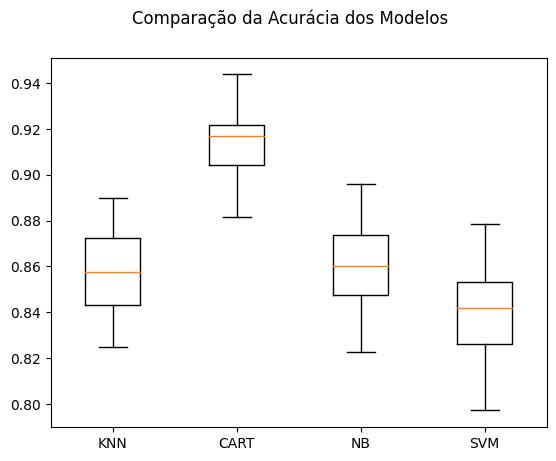

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(8)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, x_treino, y_treino, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

O modelo treinado com a Arvore de Classificação apresentou o melhor resultado (91% de acurácia média e desvio-padrão de 1,6%) e será o algoritmo escolhido

In [ ]:
# Treinando 100% da base para treino

model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(x_teste)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_teste, predictions))


0.9157617637380717


In [ ]:
# quais as caracteristicas mais importantes para definir o risco de credito do cliente?
colunas = list(x_teste.columns)
importancia = pd.DataFrame(index=colunas, data=modelo_arvore.feature_importances_)
importancia = importancia * 100
print(importancia)

                                 0
idade                     6.243412
sexo                      1.384830
dependentes               2.553191
escolaridade              2.484876
estado_civil              2.317326
salario_anual             2.247578
tipo_cartao               0.579680
meses_de_relacionamento   4.860868
qtd_produtos              7.466683
iteracoes_12m             4.710249
meses_inativo_12m         4.361366
limite_credito            8.293225
valor_transacoes_12m     26.650372
qtd_transacoes_12m       25.846345
